## Predicting Liver Disease with Tensorflow 

Given *medical data collected from patients northeast of Andhra Pradesh*, let's try to predict whether a given patient has **liver disease** or not. 

We will use Tensorflow ANN to make our predictions.

Data source: https://www.kaggle.com/datasets/uciml/indian-liver-patient-records

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

2025-06-15 18:49:20.389689: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('indian_liver_patient.csv')
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### Preprocessing

In [4]:
# missing values
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean())

In [6]:
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

#### Encoding

In [7]:
def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

In [8]:
data = binary_encode(data, 'Gender', 'Male')

Let's change the labels to 0, 1 instead of 1, 2

In [9]:
data = binary_encode(data, 'Dataset', 1)

In [10]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


#### Splitting and Scaling

In [11]:
y = data['Dataset']
X = data.drop('Dataset', axis=1)

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
X

array([[ 1.25209764, -1.76228085, -0.41887783, ...,  0.29211961,
         0.19896867, -0.14789798],
       [ 1.06663704,  0.56744644,  1.22517135, ...,  0.93756634,
         0.07315659, -0.65069686],
       [ 1.06663704,  0.56744644,  0.6449187 , ...,  0.47653296,
         0.19896867, -0.17932291],
       ...,
       [ 0.44843504,  0.56744644, -0.4027597 , ..., -0.0767071 ,
         0.07315659,  0.16635131],
       [-0.84978917,  0.56744644, -0.32216906, ...,  0.29211961,
         0.32478075,  0.16635131],
       [-0.41704777,  0.56744644, -0.37052344, ...,  0.75315299,
         1.58290153,  1.73759779]])

In [14]:
X.shape

(583, 10)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

### Training

In [16]:
X.shape

(583, 10)

In [17]:
y.sum() / len(y)

0.7135506003430532

In [25]:
inputs = tf.keras.Input(shape=(10, ))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics = [
        'accuracy',
        tf.keras.metrics.AUC(name='AUC')
    ]
)

batch_size = 64
epochs = 23

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs
)

Epoch 1/23
6/6 [==============================] - 2s 79ms/step - loss: 0.6409 - accuracy: 0.6626 - AUC: 0.5730 - val_loss: 0.5756 - val_accuracy: 0.7195 - val_AUC: 0.7321
Epoch 2/23
6/6 [==============================] - 0s 20ms/step - loss: 0.5948 - accuracy: 0.7117 - AUC: 0.6209 - val_loss: 0.5430 - val_accuracy: 0.7195 - val_AUC: 0.7388
Epoch 3/23
6/6 [==============================] - 0s 27ms/step - loss: 0.5719 - accuracy: 0.7117 - AUC: 0.6513 - val_loss: 0.5220 - val_accuracy: 0.7195 - val_AUC: 0.7749
Epoch 4/23
6/6 [==============================] - 0s 24ms/step - loss: 0.5609 - accuracy: 0.7117 - AUC: 0.6674 - val_loss: 0.5095 - val_accuracy: 0.7195 - val_AUC: 0.7918
Epoch 5/23
6/6 [==============================] - 0s 29ms/step - loss: 0.5523 - accuracy: 0.7117 - AUC: 0.6857 - val_loss: 0.4986 - val_accuracy: 0.7195 - val_AUC: 0.8040
Epoch 6/23
6/6 [==============================] - 0s 29ms/step - loss: 0.5460 - accuracy: 0.7117 - AUC: 0.7005 - val_loss: 0.4913 - val_accuracy:

### Results

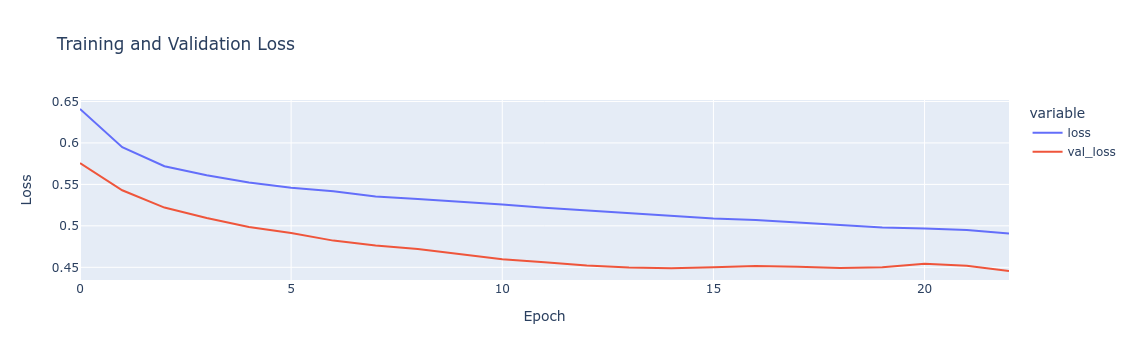

In [26]:
fig = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'index': 'Epoch', 'value': 'Loss'},
    title = 'Training and Validation Loss'
)
fig.show()

In [27]:
np.argmin(history.history['val_loss']) + 1

23

In [28]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 7ms/step - loss: 0.5404 - accuracy: 0.7200 - AUC: 0.6873


[0.5404173135757446, 0.7200000286102295, 0.687279999256134]